# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Caroline Nelson, Jiaqiu(Rachel) Wang </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

1. <img src="Q1.jpg">

In [1]:
#2

import numpy as np
import random
import sklearn
import pylab
from scipy import stats
from sklearn.utils import shuffle

In [2]:
#load data

import pandas as pd
samples=pd.read_csv('samples.csv')
samples = samples.drop(samples.columns[[0]], axis=1)


samples['intercept'] = 1
samples['x1^2'] = samples['x1']**2
samples = samples[['intercept', 'x1', 'x1^2', 'x2', 'y']]


#data1 = np.array(samples) 
X = np.array(samples.drop(samples.columns[[4]], axis=1))
y = np.array(samples['y'])
#data1

In [3]:
class StochasticGradient():
    
    
    def __init__(self, alpha, epoch):
        """The learning rate, and epochs (e.g. number of times to repeat)"""
        self.alpha = alpha
        self.epoch = epoch

    def fit(self, X, y):
        """The fit function takes X and y as arrays"""
        
        weight = np.array([0,0,0,0])
        self.weights_epoch = []

        for iteration in range(self.epoch):
            X,y = shuffle(X,y)

            for i in range(len(y)):

                hypothesis = X[i].dot(weight)
                loss = hypothesis-y[i]
                gradient = 2* X[i].T.dot(loss)
                weight = weight - self.alpha*gradient        

            # Store weights of every epoch into a list
            # self.weights_epoch.append((iteration+1,weight))

        self.weights = weight
        
    def predict(self, X_test, weight = None):
        """The predict function takes in an array for X and optional weights. Default values
        are the weights from fitting the model. To see the predicted values, use self.predictions"""
        
        # Define parameters to calculate hypothesis
        if weight == None:
            weight = self.weights
            
        else:
            weight = weight
        
        alpha = self.alpha
        
        x_test = X_test
        
        # Create list to store predictions
        predictions = []
        mse = []

        # Store prediction of every point in list
        for i in x_test:
        
            y_test = i.dot(weight)
            
            predictions.append(y_test)
            
        self.predictions = predictions

In [4]:
# Fit model for each learning rate
model1 = StochasticGradient(alpha = 0.01, epoch = 10)
model1.fit(X, y)
model1.predict(X)

model2 = StochasticGradient(alpha = 0.001, epoch = 10)
model2.fit(X, y)
model2.predict(X)

model3 = StochasticGradient(alpha = 0.0001, epoch = 10)
model3.fit(X, y)
model3.predict(X)

prediction = {
    "0.01":model1.predictions,
    "0.001":model2.predictions,
    "0.0001":model3.predictions,
    "Actual":y
}

# Show prediction results

pd.DataFrame(prediction)


,0.0001,0.001,0.01,Actual
0,1.030846,4.065188,-4.210041e+267,0.916551
1,-12.905997,-10.692398,-2.947872e+267,-11.135640
2,-13.215476,-10.158436,-3.425008e+267,-10.801274
3,1.042938,3.293869,-3.403800e+267,0.752401
4,-1.109720,0.946164,-3.495067e+267,-1.507111
5,-14.737713,-13.909588,-2.736980e+267,-14.368052
6,-14.463943,-14.101353,-2.906561e+267,-14.926405
7,-7.081659,-6.725260,-1.310722e+267,-6.696970
8,-8.718862,-8.474395,-2.256923e+267,-9.308390
9,-4.948403,-4.411653,-2.259316e+267,-5.590497


In [5]:
#plot
# data preparation
import matplotlib.pyplot as plt
%matplotlib inline

alpha_list = [0.01, 0.001, 0.0001]
#MSE
mse_epoch_01 = []
mse_epoch_001 = []
mse_epoch_0001 = []
mse_list = [mse_epoch_01, mse_epoch_001, mse_epoch_0001]

for i in range(len(mse_list)): 
    for j in range(10):
        model = StochasticGradient(alpha = alpha_list[i], epoch = j)
        model.fit(X,y)
        model.predict(X)
        mse_model = np.mean(model.predictions - y)**2
        mse_list[i].append(mse_model)


w0_epoch_01 = []
w0_epoch_001 = []
w0_epoch_0001 = []
w0_list = [w0_epoch_01, w0_epoch_001, w0_epoch_0001]

for i in range(len(w0_list)):
    for j in range(10):
        model = StochasticGradient(alpha = alpha_list[i], epoch = j)
        model.fit(X,y)
        w0_list[i].append(model.weights[0])

w1_epoch_01 = []
w1_epoch_001 = []
w1_epoch_0001 = []
w1_list = [w1_epoch_01, w1_epoch_001, w1_epoch_0001]

for i in range(len(w1_list)):
    for j in range(10):
        model = StochasticGradient(alpha = alpha_list[i], epoch = j)
        model.fit(X,y)
        w1_list[i].append(model.weights[1])

w2_epoch_01 = []
w2_epoch_001 = []
w2_epoch_0001 = []
w2_list = [w2_epoch_01, w2_epoch_001, w2_epoch_0001]

for i in range(len(w2_list)):
    for j in range(10):
        model = StochasticGradient(alpha = alpha_list[i], epoch = j)
        model.fit(X,y)
        w2_list[i].append(model.weights[2])

w3_epoch_01 = []
w3_epoch_001 = []
w3_epoch_0001 = []
w3_list = [w3_epoch_01, w3_epoch_001, w3_epoch_0001]

for i in range(len(w3_list)):
    for j in range(10):
        model = StochasticGradient(alpha = alpha_list[i], epoch = j)
        model.fit(X,y)
        w3_list[i].append(model.weights[3])

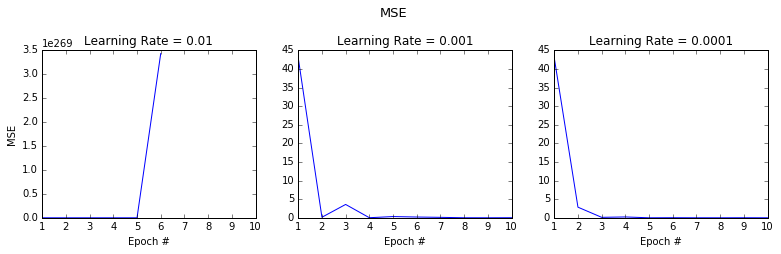

In [6]:
# Create plots for MSE

plt.figure(figsize=(3,1))
epoch_list = [1,2,3,4,5,6,7,8,9,10]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("MSE", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, mse_epoch_01)
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('MSE')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, mse_epoch_001)
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, mse_epoch_0001)
ax3.set_title('Learning Rate = 0.0001')
ax3.set_xlabel('Epoch #')


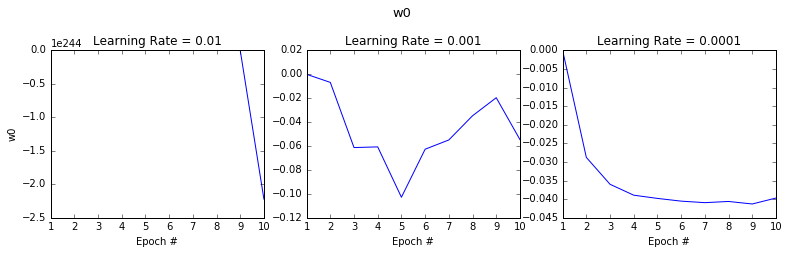

In [7]:
#create plot for w0

plt.figure(figsize=(3,1))
epoch_list = [1,2,3,4,5,6,7,8,9,10]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("w0", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, w0_list[0])
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('w0')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, w0_list[1])
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, w0_list[2])
ax3.set_title('Learning Rate = 0.0001')
ax3.set_xlabel('Epoch #')

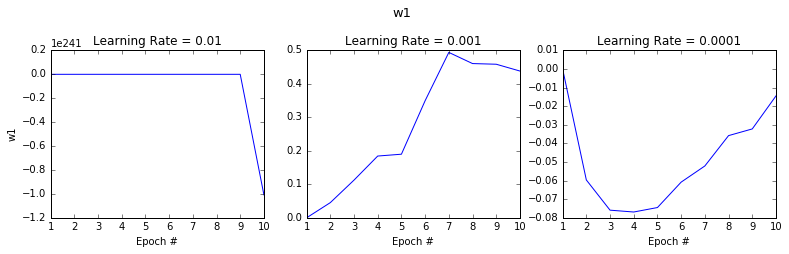

In [8]:
#create plot for w1

plt.figure(figsize=(3,1))
epoch_list = [1,2,3,4,5,6,7,8,9,10]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("w1", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, w1_list[0])
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('w1')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, w1_list[1])
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, w1_list[2])
ax3.set_title('Learning Rate = 0.0001')
ax3.set_xlabel('Epoch #')

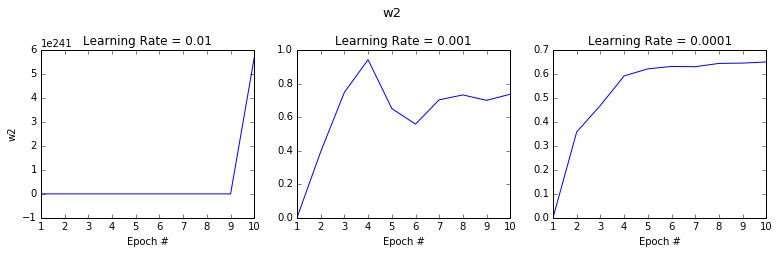

In [9]:
plt.figure(figsize=(3,1))
epoch_list = [1,2,3,4,5,6,7,8,9,10]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("w2", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, w2_list[0])
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('w2')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, w2_list[1])
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, w2_list[2])
ax3.set_title('Learning Rate = 0.0001')
ax3.set_xlabel('Epoch #')

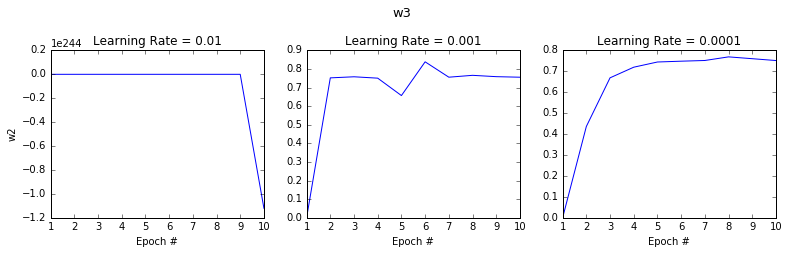

In [10]:
plt.figure(figsize=(3,1))
epoch_list = [1,2,3,4,5,6,7,8,9,10]

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.suptitle("w3", fontsize = 13, y = 1.1)
f.set_size_inches(13,3)

ax1.plot(epoch_list, w3_list[0])
ax1.set_title('Learning Rate = 0.01')
ax1.set_xlabel('Epoch #')
ax1.set_ylabel('w2')
ax1.set_xlim(1,10)

ax2.plot(epoch_list, w3_list[1])
ax2.set_title('Learning Rate = 0.001')
ax2.set_xlabel('Epoch #')

ax3.plot(epoch_list, w3_list[2])
ax3.set_title('Learning Rate = 0.0001')
ax3.set_xlabel('Epoch #')

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

### Answer

No, we will not be able to get to the local minima, since the derivative at a point between B and C is zero, and will not update the weight.

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

In [12]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
X_test = X_scaler.transform(X_test)
X_test=pd.DataFrame(X_test)

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

#### Part 1

In [13]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, random_state=42)


MSE_MLP = []
for train, test in kf.split(X_train):
    MLP= MLPRegressor(hidden_layer_sizes=(2,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
    MLP.fit(X_train.iloc[train], y_train.iloc[train])
        
    pred=MLP.predict(X_train.iloc[test])
    actual=y_train.iloc[test]
        
    MSE=np.mean((pred-actual)**2)
        
    MSE_MLP.append(MSE)
    
average_RMSE1= np.mean(np.sqrt(MSE_MLP))
average_RMSE1       

409.78816220052829

In [14]:
MSE_MLP2 = []
for train, test in kf.split(X_train):
    MLP2= MLPRegressor(hidden_layer_sizes=(15,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
    MLP2.fit(X_train.iloc[train], y_train.iloc[train])
        
    pred=MLP2.predict(X_train.iloc[test])
    actual=y_train.iloc[test]
        
    MSE2=np.mean((pred-actual)**2)
        
    MSE_MLP2.append(MSE2)
    
average_RMSE2= np.mean(np.sqrt(MSE_MLP2))
average_RMSE2       

310.86752082120927

We can see that the larger the hidden layer size, the more accurate the model.

#### Part 2

In [15]:
MLP3= MLPRegressor(hidden_layer_sizes=(2,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
MLP3.fit(X_train, y_train)
        
pred=MLP3.predict(X_test)
actual=y_test
        
MSE3=np.mean((pred-actual)**2)
np.sqrt(MSE3)

486.72298623826163

In [16]:
MLP4= MLPRegressor(hidden_layer_sizes=(15,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
MLP4.fit(X_train, y_train)
        
pred=MLP4.predict(X_test)
actual=y_test
        
MSE4=np.mean((pred-actual)**2)
np.sqrt(MSE4)   

412.63797275368898

The same is true without cross validation; the larger the hidden layer size, the more accurate the model will be.

#### Part 3

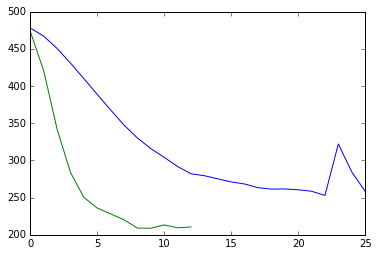

In [17]:
import matplotlib.pyplot as plt
x_coordinate = [ 1 * i for i in range(len(MLP3.loss_curve_)) ]
plt.plot(x_coordinate,np.sqrt(MLP3.loss_curve_))
x_coordinate = [ 1 * i for i in range(len(MLP4.loss_curve_)) ]
plt.plot(x_coordinate,np.sqrt(MLP4.loss_curve_))
plt.show()


# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

In [19]:
data['Direction'][data['Direction'] == 'Up'] = 1.0
data['Direction'][data['Direction'] == 'Down'] = 0.0

Xtrain=data.iloc[199:1199]
train_set=Xtrain.drop(['Direction'],axis=1)

Xtest=data.iloc[1200:1250]
test_set=Xtest.drop(['Direction'],axis=1)

ytrain=np.asarray(data['Direction'].iloc[199:1199],dtype='int')
ytest=np.asarray(data['Direction'].iloc[1200:1250], dtype='int')

C:\Users\rache\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rache\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
NB=GaussianNB()
NB.fit(train_set,ytrain)

a=NB.predict_proba(test_set)
scores_NB=[i[1] for i in a]
#scores_a

In [21]:
lda=LDA()
lda.fit(train_set, ytrain)

b=lda.predict_proba(test_set)
scores_LDA=[i[1] for i in b]
#scores_b

In [22]:
qda=QDA()
qda.fit(train_set, ytrain)

c=qda.predict_proba(test_set)
scores_QDA=[i[1] for i in c]
#scores_c

0.518333333333


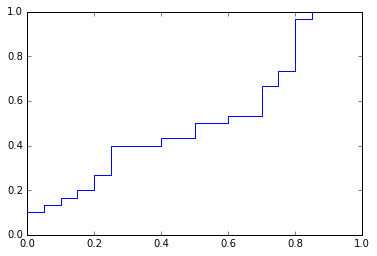

In [23]:
# Compute ROC curve and ROC area for each class
fpr, tpr, threshold=roc_curve(ytest, scores_NB)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_NB)

0.518333333333


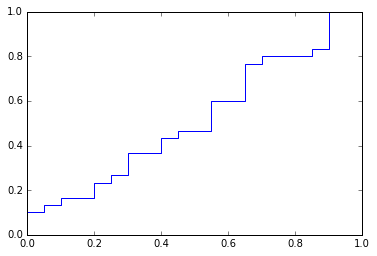

In [24]:
fpr, tpr, threshold=roc_curve(ytest, scores_LDA)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_LDA)

0.63


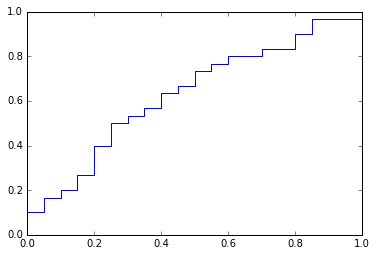

In [25]:
fpr, tpr, threshold=roc_curve(ytest, scores_QDA)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_QDA)

The QDA scores are the most precise method of predicting stock prices in this example, since the area under the curve is much more than 0.5.  Naive Bayes and LDA are tied at a lower precision.  This could be because the separator between 'Up' and 'Down' is not perfectly linear.

In [26]:
Xtrain=data.iloc[1099:1199]
train_set=Xtrain.drop(['Direction'],axis=1)

Xtest=data.iloc[1200:1250]
test_set=Xtest.drop(['Direction'],axis=1)

ytrain=np.asarray(data['Direction'].iloc[1099:1199],dtype='int')
ytest=np.asarray(data['Direction'].iloc[1200:1250], dtype='int')

In [27]:
NB=GaussianNB()
NB.fit(train_set,ytrain)

a=NB.predict_proba(test_set)
scores_NB=[i[1] for i in a]

lda=LDA()
lda.fit(train_set, ytrain)

b=lda.predict_proba(test_set)
scores_LDA=[i[1] for i in b]

qda=QDA()
qda.fit(train_set, ytrain)

c=qda.predict_proba(test_set)
scores_QDA=[i[1] for i in c]


0.505


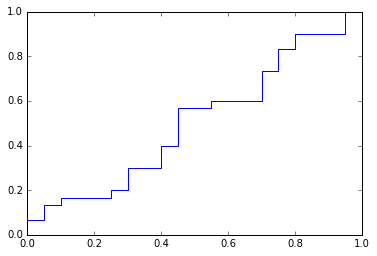

In [28]:
fpr, tpr, threshold=roc_curve(ytest, scores_NB)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_NB)

0.421666666667


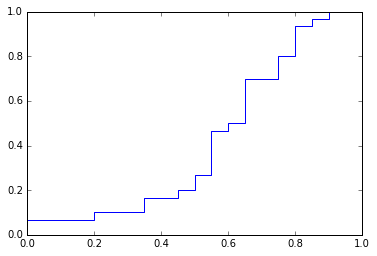

In [29]:
fpr, tpr, threshold=roc_curve(ytest, scores_LDA)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_LDA)

0.511666666667


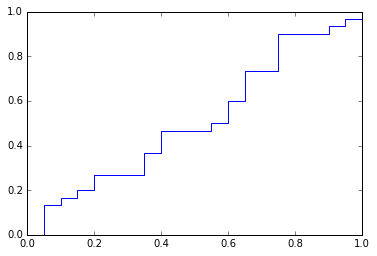

In [30]:
fpr, tpr, threshold=roc_curve(ytest, scores_QDA)
plt.plot(fpr, tpr)
print roc_auc_score(ytest, scores_QDA)

Since we are training these models with fewer data points, it makes sense for their accuracies to be lower.  Once again, QDA was the most accurate, followed by Naive Bayes and LDA.

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [455]:
import pandas as pd
import numpy as np

from sklearn import cross_validation
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)
Auto.columns.values
np.median(Auto['mpg'])

22.75

In [456]:
Auto['mpg01'] = 0.0
Auto['mpg01'][Auto['mpg'] > np.median(Auto['mpg'])] = 1.0
Auto[:10]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0.0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0.0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0.0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0.0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0.0


In [33]:
y = Auto['mpg01']
first_X = Auto.drop('mpg',axis=1)
X=first_X.drop('mpg01', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [34]:
Log1=LogisticRegression(C=1000000)
Log1.fit(X_train, y_train)
pred=Log1.predict(X_test)
actual=y_test
confusion_matrix(actual, pred)

array([[55, 15],
       [ 2, 58]])

In [35]:
mean_squared_error(actual, pred)

0.13076923076923078

accuracy score class=1: 58/(58+15)=58/73=79.45%
accuracy score class=0: 55/57=96.49%
average per class: (55+58)/(17+55+58)=86.92%

In [36]:
from sklearn.metrics import accuracy_score, make_scorer

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

avg_per_class=make_scorer(accuracy_score, greater_is_better=True)

clf = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring=avg_per_class)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [37]:
print clf.best_estimator_
print clf.best_score_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.923664122137


In [38]:
clf2 = GridSearchCV(LogisticRegression(penalty='l1'), parameters, cv=5, scoring=avg_per_class)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [39]:
print clf2.best_estimator_
print clf2.best_score_


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.927480916031


In [40]:
#test data accuracy scores
test_run=LogisticRegression(C=0.01)
test_run.fit(X_train, y_train)
pred=test_run.predict(X_test)
actual=y_test
print 'test set accuracy (C=0.01, penalty=L2): ', 1-np.mean((actual-pred)**2)
confusion_matrix(actual, pred)

test set accuracy (C=0.01, penalty=L2):  0.892307692308


array([[56, 14],
       [ 0, 60]])

In [41]:
test_run2=LogisticRegression(C=10, penalty='l1')
test_run2.fit(X_train, y_train)
pred=test_run2.predict(X_test)
actual=y_test
print 'test set accuracy (C=10, penalty=L1)', 1-np.mean((actual-pred)**2)
confusion_matrix(actual, pred)

test set accuracy (C=10, penalty=L1) 0.884615384615


array([[56, 14],
       [ 1, 59]])

In [458]:
Auto[Auto['mpg']<22.75].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.0
mean,16.921939,6.765306,273.158163,130.112245,3620.403061,14.585714,74.397959,1.163265,0.0
std,3.143749,1.420011,89.523986,37.355639,676.932187,2.685154,2.970763,0.479185,0.0
min,9.000000,3.000000,70.000000,72.000000,2124.000000,8.000000,70.000000,1.000000,0.0
25%,14.000000,6.000000,225.000000,100.000000,3139.750000,12.950000,72.000000,1.000000,0.0
50%,17.000000,8.000000,261.000000,125.000000,3607.000000,14.500000,74.000000,1.000000,0.0
75%,19.250000,8.000000,350.000000,150.000000,4156.750000,16.250000,77.000000,1.000000,0.0
max,22.500000,8.000000,455.000000,230.000000,5140.000000,21.900000,82.000000,3.000000,0.0


The model with the highest accuracy score uses 'L2' penalty, and a 'C' of 0.01.  It predicts the '1' class with 100% accuracy, and the '0' class with 80% accuracy. This could be because of the diversity of displacement, weight, and horsepower in the '0' class, which could effect the miles per gallon, and lead to a missed prediction.

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
house_data=pd.read_csv('train.csv')
house_data.columns.values
house_data[:10]
with_dummies=pd.get_dummies(house_data).dropna()
with_dummies['YearBuilt']=np.log(with_dummies['YearBuilt'])
with_dummies[:10]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,7.602401,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,7.588830,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,7.601402,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,7.557473,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,7.600902,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,50,85.0,14115,5,5,7.597396,1995,0.0,732,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,20,75.0,10084,8,5,7.602900,2005,186.0,1369,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,50,51.0,6120,7,5,7.565793,1950,0.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,190,50.0,7420,5,6,7.569928,1950,0.0,851,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,11,20,70.0,11200,5,5,7.583248,1965,0.0,906,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.linear_model import LinearRegression
y = with_dummies['SalePrice']
X = with_dummies.drop('SalePrice',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

The preprocessing in the cells above converted categorical variables to dummies, dropped the 'NaN' points, and completed a log transformation on the variable 'YearBuilt'.

In [20]:
linear=LinearRegression()
linear.fit(X_train, y_train)
pred=linear.predict(X_test)
actual=y_test
mean_sq_err=np.mean((actual-pred)**2)
print 'Root mean square error: ', np.sqrt(mean_sq_err)

Root mean square error:  167377.06317


Without removing any variables, an OLS regression gave an RMSE of 167,377.06.  We will now try a lasso regression to remove some less important variables.

In [24]:
#run lasso, with 5 fold cross validation to find best lambda, using MSE to score lambdas
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

kf=KFold(n_splits=5, random_state=42)


alphas = 10**np.linspace(10,-2,100)*0.5

scores = []

for alpha in alphas:
    MSELasso = []
    for train, test in kf.split(X_train):
        lasso= Lasso(random_state=42, alpha=alpha)
        lasso.fit(X_train.iloc[train], y_train.iloc[train])
        
        pred=lasso.predict(X.iloc[test])
        actual=y[test]
        
        MSE=np.mean((pred-actual)**2)
        
        MSELasso.append(MSE)
    
    scores.append((alpha, np.mean(MSELasso)))
        
best_lambda_lasso = sorted(scores, key=lambda x: x[1])[0][0]

In [48]:
from sklearn.linear_model import Lasso
lasso1=Lasso(random_state=42, alpha=best_lambda_lasso, fit_intercept=False)
lasso1.fit(X_train, y_train)
pred_lasso=lasso1.predict(X_test)
print 'Using our best lambda, we obtained an RMSE of ', np.sqrt(np.mean((pred_lasso-y_test)**2))

Using our best lambda, we obtained an RMSE of  80503.6948541


In [49]:
best_lambda_lasso

57487849.769886784

In [50]:
lasso1.coef_

array([  0.        ,   0.        ,   0.        ,   4.60868705,
         0.        ,   0.        ,   0.        ,  33.05933675,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
        27.01164025,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.  

In [51]:
print with_dummies.columns.values[3]
print with_dummies.columns.values[6]
print with_dummies.columns.values[16]
#These seem to be the only significant variables

LotArea
YearBuilt
GrLivArea


The above variables seem to be the most significant, so we will run linear regression, ridge, and an MLP on only these variables.

In [26]:
new_df=with_dummies[['LotArea', 'YearBuilt', 'GrLivArea', 'SalePrice']]
new_X=new_df.drop('SalePrice', axis=1)
new_y=new_df['SalePrice']

In [27]:
new_df

,LotArea,YearBuilt,GrLivArea,SalePrice
0,8450,7.602401,1710,208500
1,9600,7.588830,1262,181500
2,11250,7.601402,1786,223500
3,9550,7.557473,1717,140000
4,14260,7.600902,2198,250000
5,14115,7.597396,1362,143000
6,10084,7.602900,1694,307000
8,6120,7.565793,1774,129900
9,7420,7.569928,1077,118000
10,11200,7.583248,1040,129500


In [28]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X,new_y,test_size = 0.33, random_state=42)

In [29]:
linear=LinearRegression()
linear.fit(new_X_train, new_y_train)
pred=linear.predict(new_X_test)
actual=new_y_test
mean_sq_err=np.mean((actual-pred)**2)
print 'Root mean square error with three most important variables: ', np.sqrt(mean_sq_err)

Root mean square error with three most important variables:  48916.9615396


Now to do a ridge regression on the three important variables...

In [31]:
from sklearn.linear_model import Ridge

kf=KFold(n_splits=5, random_state=42)


alphas = 10**np.linspace(10,-2,100)*0.5

scores = []

for alpha in alphas:
    MSERidge = []
    for train, test in kf.split(new_X_train):
        ridge= Ridge(random_state=42, alpha=alpha)
        ridge.fit(new_X_train.iloc[train], new_y_train.iloc[train])
        
        pred=ridge.predict(new_X.iloc[test])
        actual=new_y[test]
        
        MSE=np.mean((pred-actual)**2)
        
        MSERidge.append(MSE)
    
    scores.append((alpha, np.mean(MSERidge)))
        
best_lambda_ridge = sorted(scores, key=lambda x: x[1])[0][0]

In [32]:
best_lambda_ridge

5000000000.0

In [33]:
ridge1=Ridge(alpha=best_lambda_ridge)
ridge1.fit(new_X_train, new_y_train)
pred_ridge=ridge1.predict(new_X_test)
print 'Ridge regression on the most important variables gave an RMSE of ', np.sqrt(np.mean((pred_ridge-new_y_test)**2))

Ridge regression on the most important variables gave an RMSE of  83462.7899562


Now to run an MLP on the whole data set, and then only the important variables...

In [35]:
from sklearn.neural_network import MLPRegressor
kf=KFold(n_splits=5)


MSE_MLP = []
for train, test in kf.split(X_train):
    MLP= MLPRegressor(hidden_layer_sizes=(2,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
    MLP.fit(X_train.iloc[train], y_train.iloc[train])
        
    pred=MLP.predict(X_train.iloc[test])
    actual=y_train.iloc[test]
        
    MSE=np.mean((pred-actual)**2)
        
    MSE_MLP.append(MSE)
    
average_RMSE1= np.mean(np.sqrt(MSE_MLP))
average_RMSE1       

79996.362899293905

In [36]:
kf=KFold(n_splits=5)


MSE_MLP = []
for train, test in kf.split(new_X_train):
    MLP= MLPRegressor(hidden_layer_sizes=(15,),activation='tanh',solver='sgd', learning_rate='constant',random_state=42, batch_size=40, learning_rate_init=0.001)
    MLP.fit(new_X_train.iloc[train], new_y_train.iloc[train])
        
    pred=MLP.predict(new_X_train.iloc[test])
    actual=new_y_train.iloc[test]
        
    MSE=np.mean((pred-actual)**2)
        
    MSE_MLP.append(MSE)
    
average_RMSE1= np.mean(np.sqrt(MSE_MLP))
average_RMSE1       

79683.780703951634

The best model we developed was by taking out variables with coefficients reduced to zero by lasso regression, and then a ridge regression on those variables.  This brought an error around 40,000, depending on the seed used.  The score reported from kaggle.com is...

<img src="Capture.png">

In [37]:
test=pd.read_csv('test.csv')

In [38]:
test['YearBuilt']=np.log(test['YearBuilt'])

In [39]:
test_use=test[['LotArea', 'YearBuilt', 'GrLivArea']]
#test_with_dummies=pd.get_dummies(test_use).dropna()

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linear = LinearRegression()
linear.fit(new_X, new_y)
linear.predict(test_use)

array([ 115777.87642002,  156024.39262278,  225181.67688991, ...,
        154569.44961458,  154441.14528257,  251165.87588569])

In [45]:
output = linear.predict(test_use)
final = pd.DataFrame(output, index=test.Id.values, columns=['SalePrice'])
final.index.name = 'Id'
final.to_csv('prediction.csv')